
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, September 17 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Team

### Apoorva Jasti AJ29874

### Sadhana Koneni SK44735

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer

Issue: Solve a problem, but don’t realize model is being used to solve a totally different problem.

I was working on a time series forecasting project for a retail client. As part of this, we built a model which would predict the unit sales during a promotion period with ~90% accuracy. But there were 2 problems - non-promotion days and the prediction for Black Friday. We learnt that the planning team used the model to predict for the non-promotion days and we had to clarify to them that since there were no variables added to explain the behavior during the non-promotion days, it's not expected to perform well for that period. Second, we had treated the data for outliers and in the process the spike in sales during Black Friday was also pruned. This led to high MAPE for that particular promotion. On presentation to business, they pointed this out saying the model needs to perform better for Black Friday. We went back and removed the outlier treatment for this holiday promotion and model gave promising results whihc was well received by the business team. 




# Question 2: MLE Estimate (5+10+10 points)

Consider a coin tossing experiment where a biased coin is tossed repeatedly for $n$ times with independence in successive tosses. 
If we record the outcome of each toss as $X_{i}$, for $i \in \{1,2,3,....,n\}$ as follows

$  
X_{i} = 
     \begin{cases}
       \text{1,} &\quad\text{if $i^{th}$ toss results in $Heads$,}\\
       \text{0,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

then $X_{1}, X_{2}, .... X_{n}$ will be a sequence of $0$'s and $1$'s. Assume that for this coin $P(Heads) = p$, which of course is not known to the experimenter. 

1. The log-likelihood function of the observations, as discussed in the class, denotes the probability of occurrence of the observations. Write the log-likelihood function for the set of observations $X_{1}, X_{2}, .... X_{n}$. 

2. Compute an MLE estimate of $p$.

3. Check if the obtained estimate is unbiased.


## Answer




In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

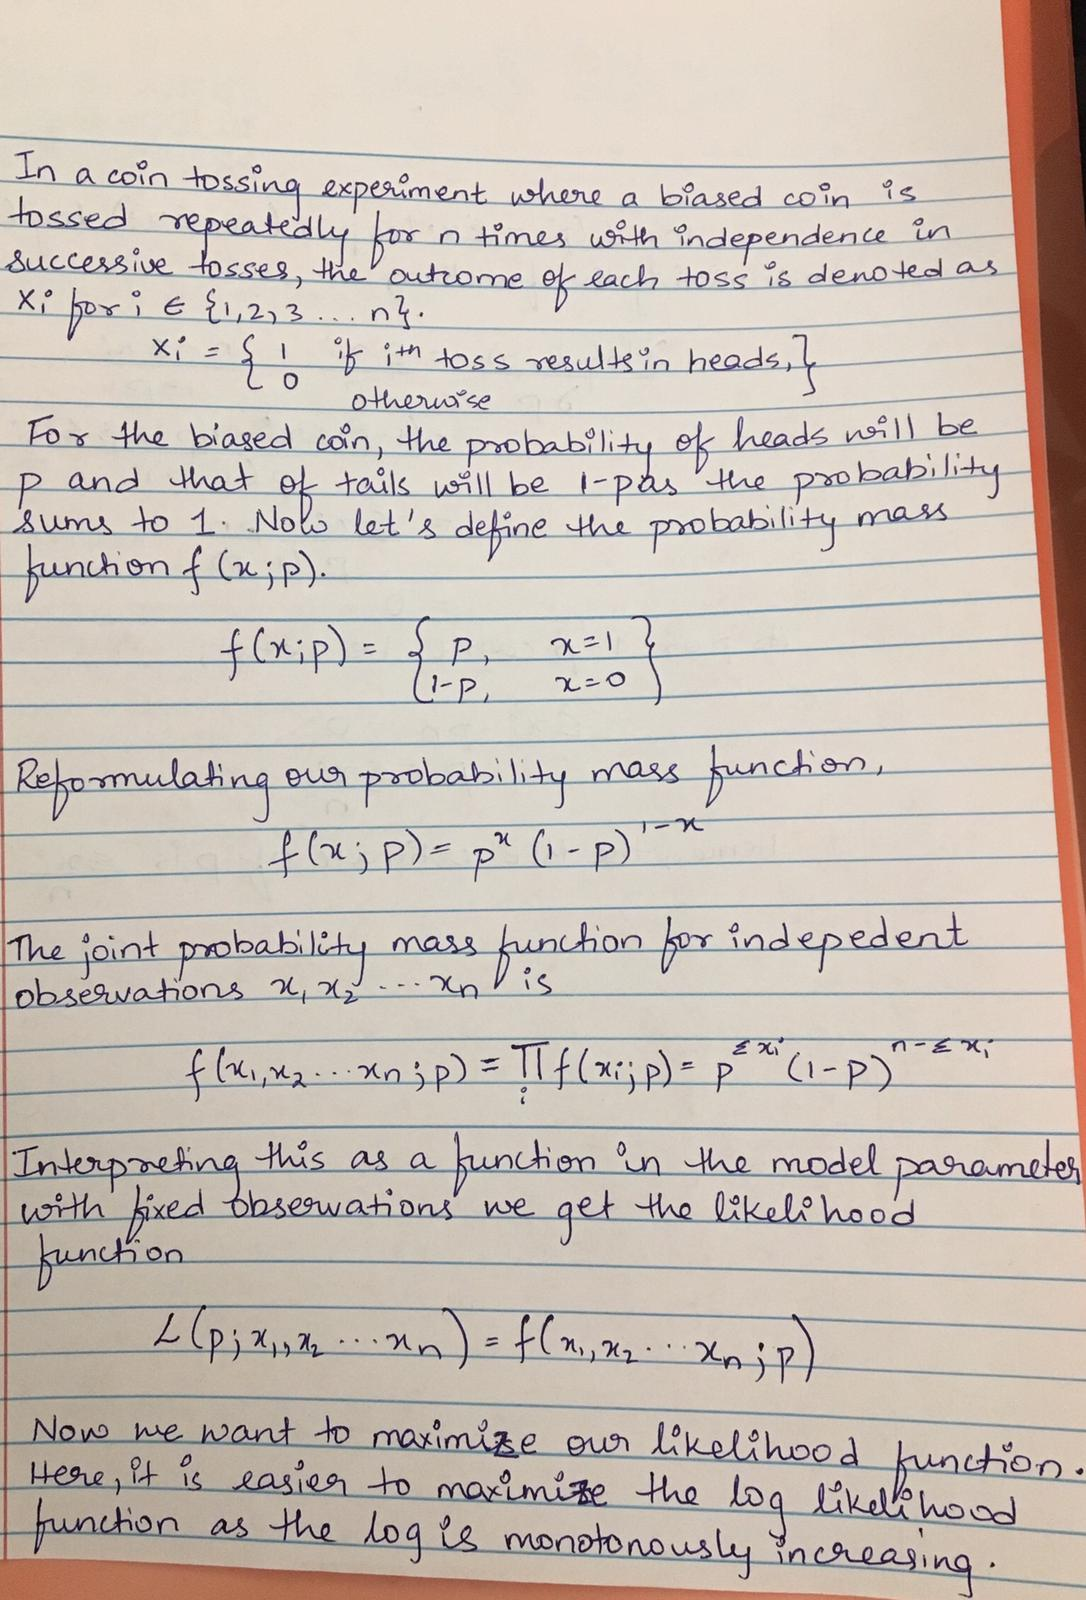

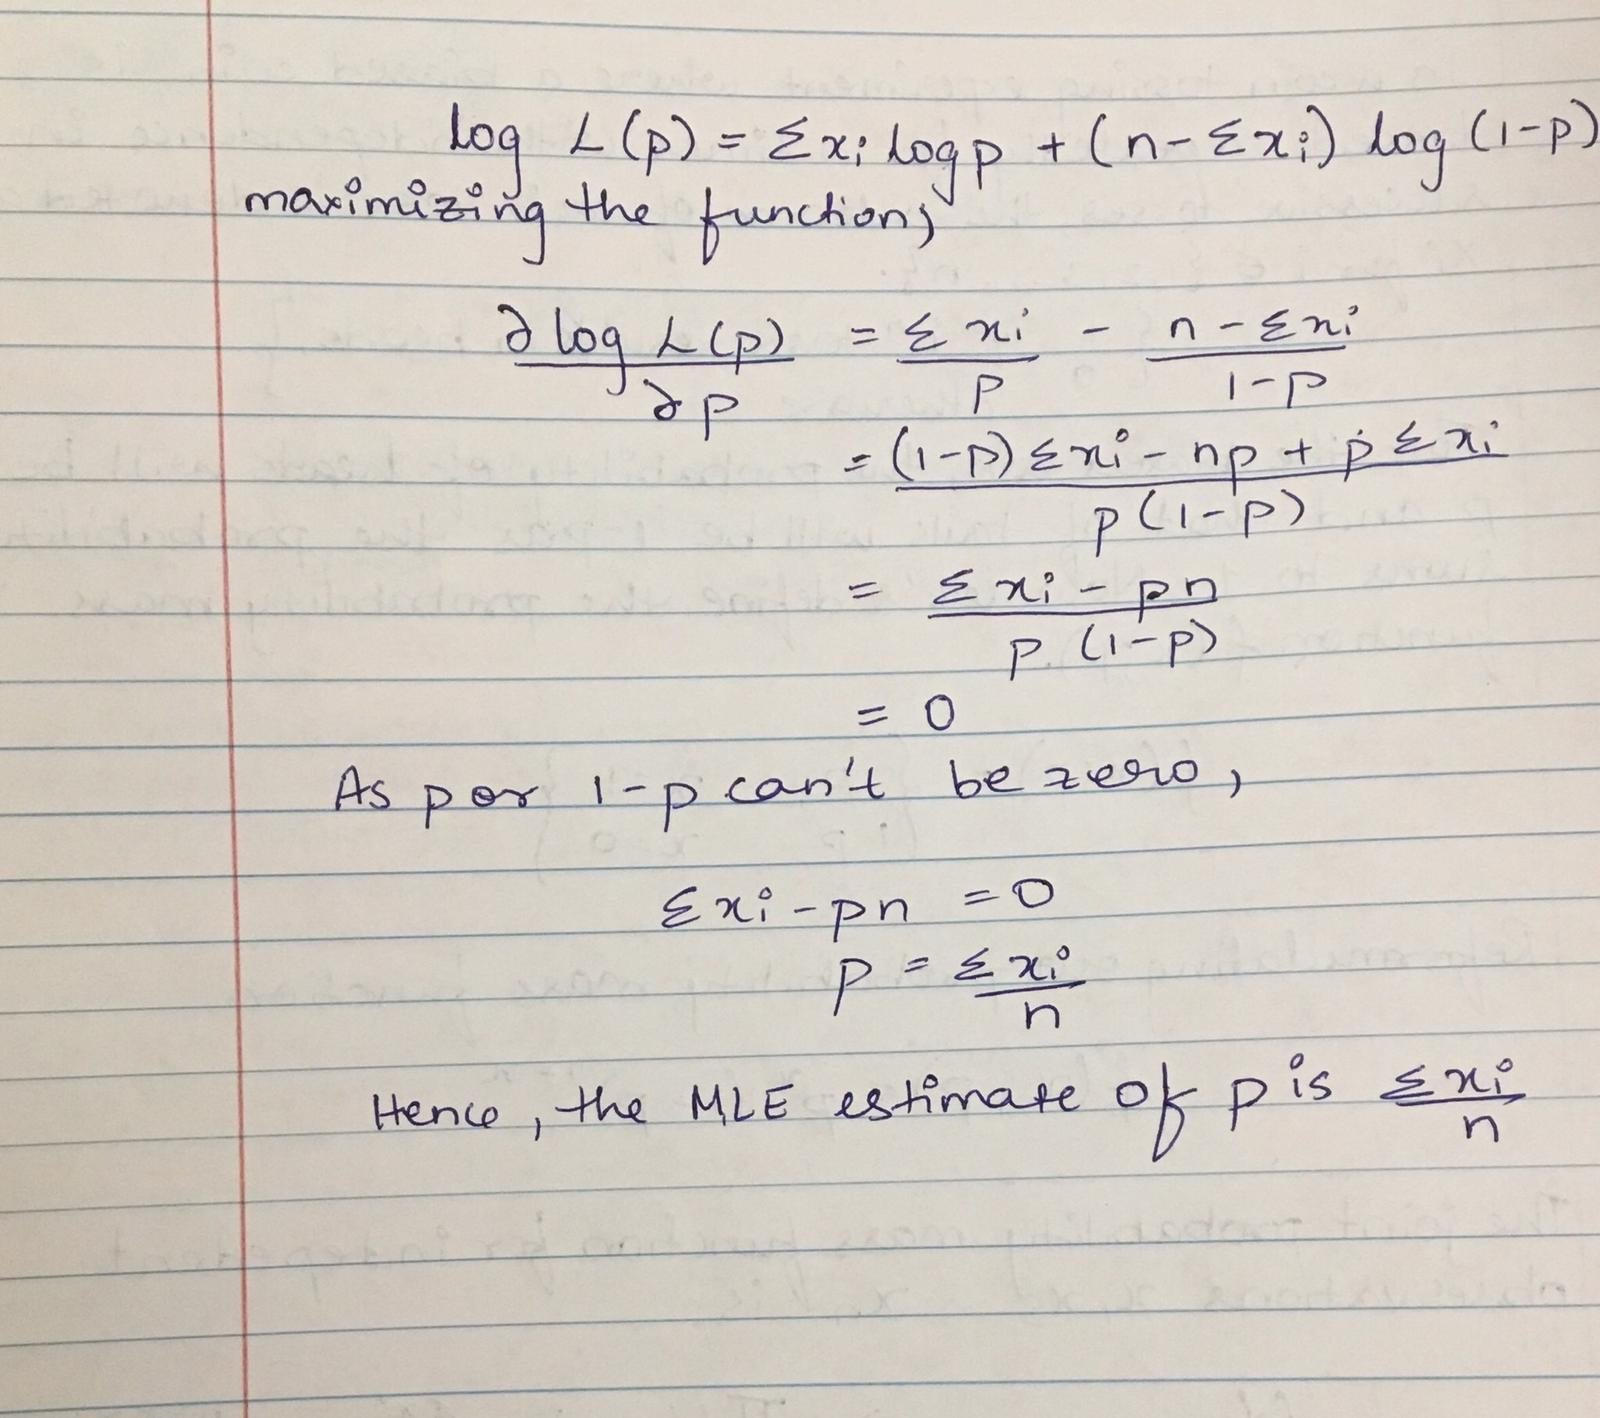

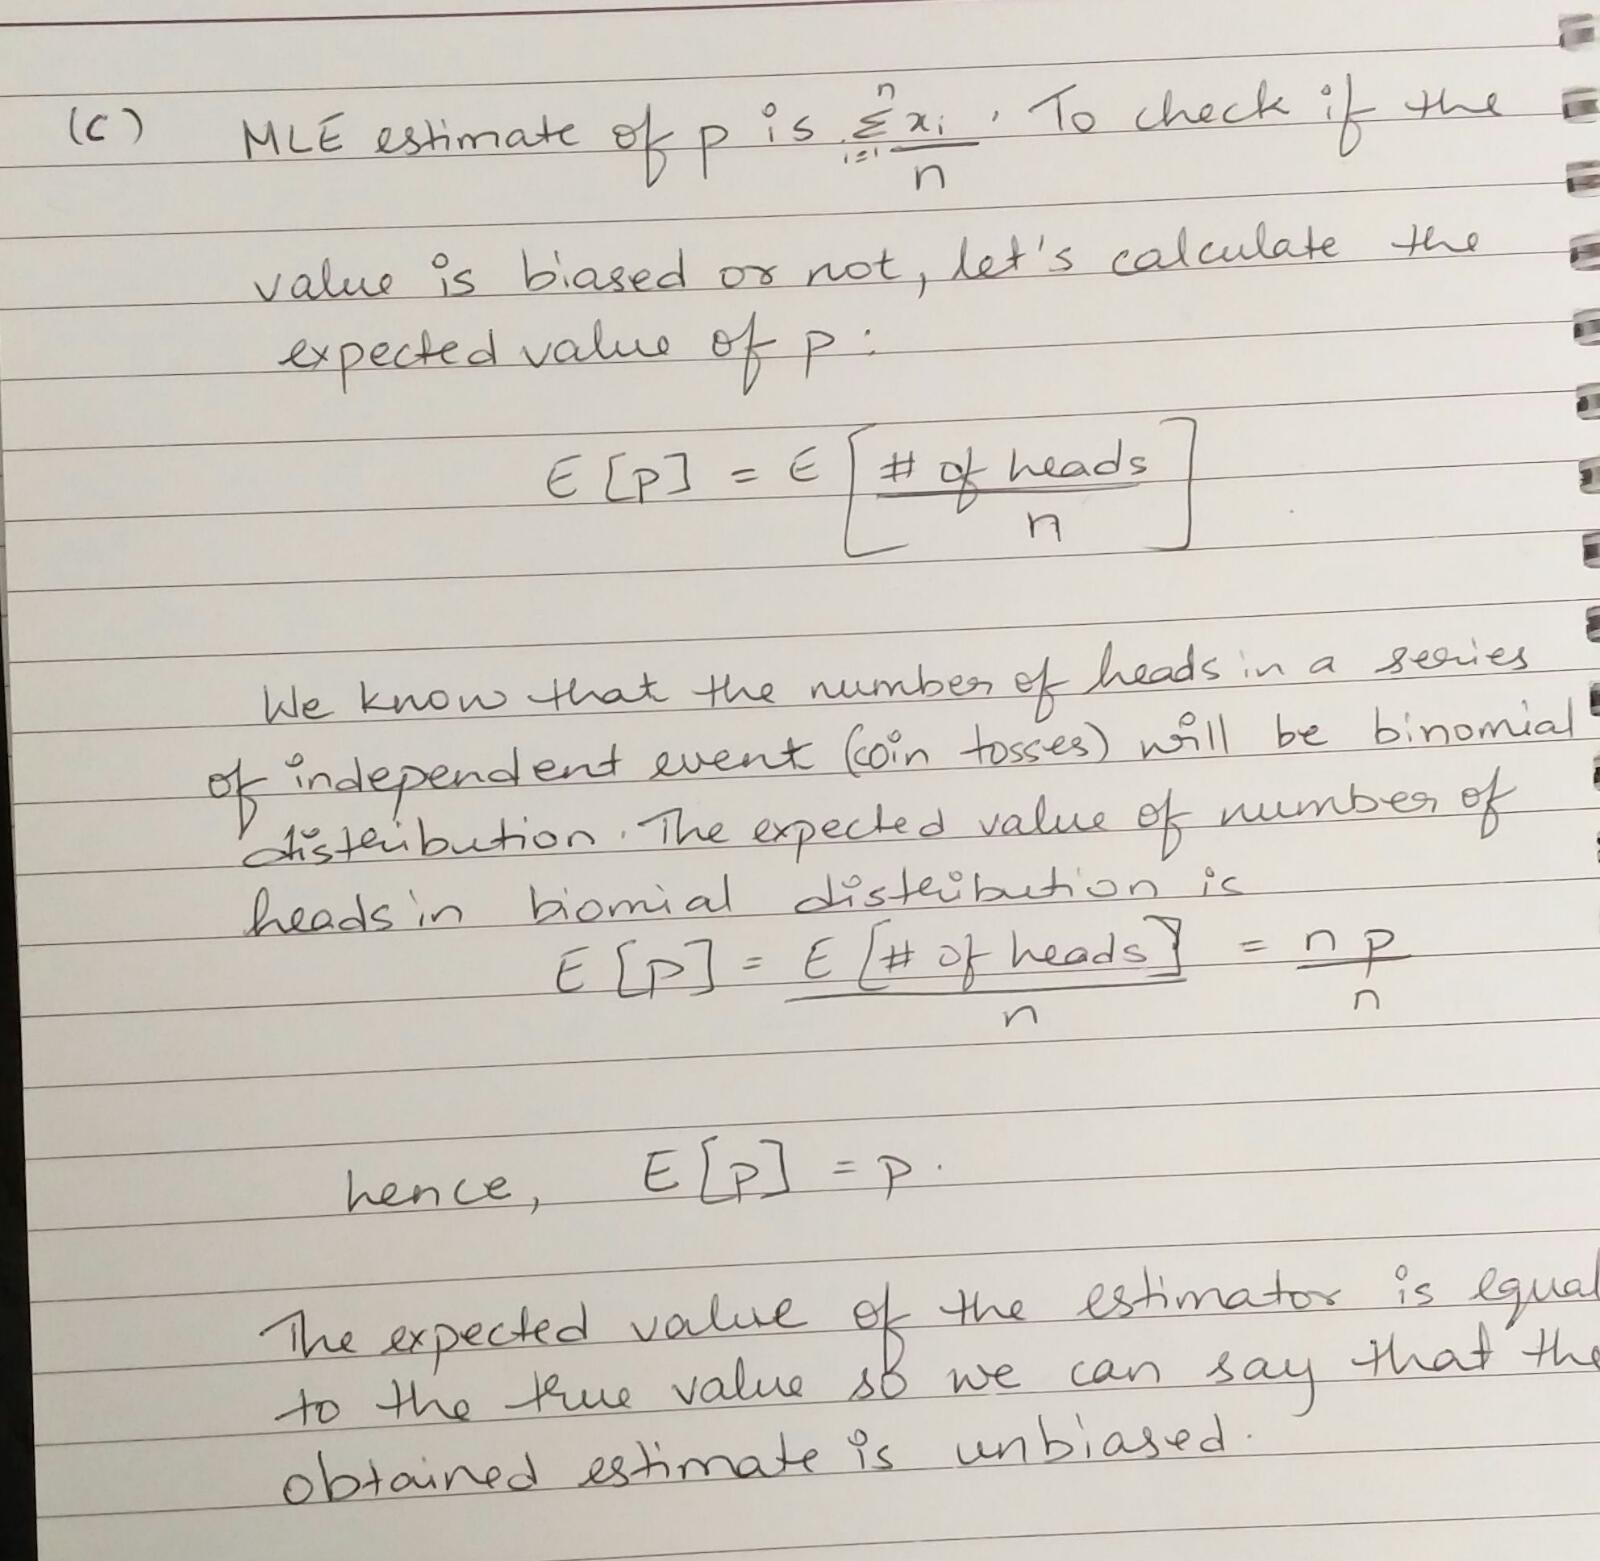

In [20]:
%matplotlib inline
from IPython.display import Image
Image(filename='image1.jpeg')
Image(filename='image2.jpeg')
Image(filename='image3.jpeg')

# Question 3: Multiple Linear Regression in Python (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easier to run the models. 


In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with test_size = 0.30 and random_state = 11. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set (you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'. 

e.  (6 pts) Add the following independent variables to both train and test sets:
1. average_bedrooms = total_bedrooms/households
2. average_rooms = total_rooms/households
3. average_population = population/households

Recalculate the correlation matrix. What do you observe about the correlation values of the above new variables?

f. (5 pts) Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

## Answer

## (a)

In [3]:
X.shape
X.head(5)

(20433, 8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


## (b)

In [21]:
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X, Y)

lin_reg.coef_

Y_pred = lin_reg.predict(X)
# Calculating the mean absolute error
mean_absolute_error(Y, Y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([-4.25778507e+04, -4.23105549e+04,  1.15112773e+03, -4.39989050e+00,
        6.20709020e+01, -3.93437090e+01,  8.56715836e+01,  4.18378079e+04,
        3.42301534e+04, -4.84699883e+03,  5.44489928e+01])

50524.37213943073

## (c)

In [5]:
# Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 11.
# Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. 
# Compare the two MAE values thus obtained.
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=11)

lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
mean_absolute_error(y_train, y_pred_train)

y_pred_test = lin_reg.predict(X_test)
mean_absolute_error(y_test, y_pred_test)
# The mean absolute errors for train and test are comparable. The test MAE is higher than the train MAE. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

50749.10314465295

50916.74299435109

## (d)

In [6]:
# Calculate the pearson correlation matrix of the independent variables in the training set (you can use this). 
# Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'.

X_train.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000


Independent variables having correlation greater than 0.9 w.r.t 'households': total_rooms, total_bedrooms, population



## (e)

In [7]:
X['average_bedrooms'] = X['total_bedrooms']/X['households']
X['average_rooms'] = X['total_rooms']/X['households']
X['average_population'] = X['population']/X['households']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=11)

X_train.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,average_bedrooms,average_rooms,average_population
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466,0.017548,-0.027099,0.011811
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943,0.062059,0.104294,-0.002330
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736,-0.077163,-0.158539,0.012569
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486,0.036170,0.146227,-0.031031
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082,0.054525,0.004237,-0.036556
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523,-0.062026,-0.072951,0.077684
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033,-0.050050,-0.081950,-0.034892
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000,-0.059447,0.350785,0.000417
average_bedrooms,0.017548,0.062059,-0.077163,0.036170,0.054525,-0.062026,-0.050050,-0.059447,1.000000,0.833841,-0.002194
average_rooms,-0.027099,0.104294,-0.158539,0.146227,0.004237,-0.072951,-0.081950,0.350785,0.833841,1.000000,0.003475


Observation: average_rooms and average_bedrooms are correlated (0.83) but households column has very low correlation with the new variables.

## (f)

In [8]:
# Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
mean_absolute_error(y_train, y_pred_train)

y_pred_test = lin_reg.predict(X_test)
mean_absolute_error(y_test, y_pred_test)

# The MAE has reduced when the new variables are added. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

50474.268791457886

50783.974603927876

# Question 4: Ridge and Lasso Regression (30 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the dependent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [9]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import scale

X_scale = scale(X, axis=0, with_mean=True, with_std=True, copy=True)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, Y, test_size=0.30, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.30, random_state=11)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)


## Answer



## 1

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.6372...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])}],
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0

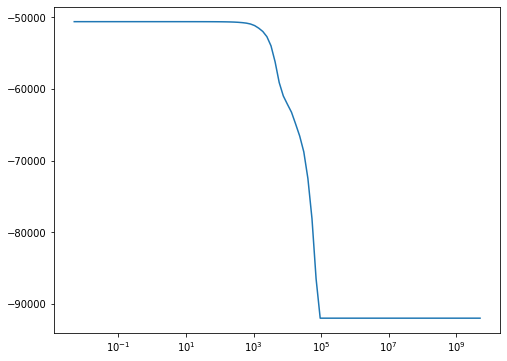

{'alpha': 0.005}

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

lasso = Lasso(random_state=0, max_iter=10000)

import numpy as np
alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.show()
# alphas
lasso_best_alpha = clf.best_params_


In [22]:
lasso_best_alpha

{'alpha': 0.005}

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, random_state=0,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])}],
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

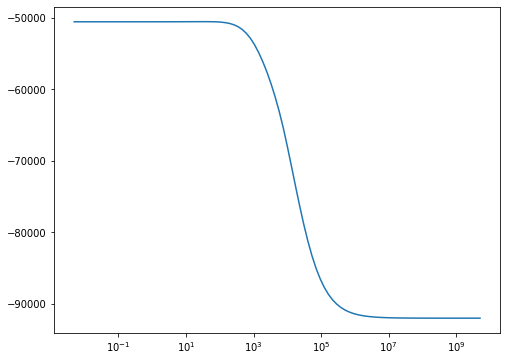

In [23]:
ridge = Ridge(random_state=0, max_iter=10000)

import numpy as np
alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(ridge, tuned_parameters, cv=5, refit=False, scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.show()
# alphas
ridge_best_alpha = clf.best_params_


In [24]:
ridge_best_alpha

{'alpha': 37.823166377731454}

## 2

Ridge(alpha=5000000000.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3782316637.773145, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2861183829.67511, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2164380640.5415306, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1637274581.438866, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1238538177.995857, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=936908711.4301934, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=708737081.4634038, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=536133611.00516266, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=405565415.3948445, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=306795363.6706582, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=232079441.68063864, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=175559586.71075636, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=132804389.1473342, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100461650.1282523, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=75995554.14764665, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=57487849.769886784, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=43487450.13088917, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=32896661.232878413, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=24885117.82166057, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=18824679.033962358, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=14240179.342179025, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10772173.450159412, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8148754.173103217, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6164233.69721033, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4663016.734416099, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3527401.1553593227, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2668349.615603151, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2018508.6292982749, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1526927.7544167063, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1155064.850041579, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=873764.2000038414, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=660970.5742330144, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=500000.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=378231.66377731453, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=286118.382967511, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=216438.06405415307, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=163727.45814388624, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=123853.81779958545, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=93690.87114301915, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=70873.70814634024, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=53613.36110051616, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=40556.54153948436, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=30679.536367065877, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=23207.944168063863, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=17555.958671075638, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=13280.43891473342, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10046.16501282523, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7599.555414764665, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5748.784976988678, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4348.745013088917, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3289.6661232878414, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2488.511782166057, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1882.4679033962318, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1424.0179342178994, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1077.2173450159412, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=814.8754173103217, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=616.4233697210329, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=466.30167344161, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=352.74011553593226, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=266.8349615603151, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=201.85086292982749, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=152.69277544167062, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=115.50648500415791, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=87.37642000038414, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=66.09705742330144, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=50.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=37.823166377731454, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=28.611838296751102, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=21.643806405415308, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=16.372745814388658, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=12.38538177995857, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9.369087114301934, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7.087370814634009, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5.361336110051605, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4.055654153948428, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3.0679536367065814, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2.320794416806386, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.7555958671075638, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.328043891473342, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.004616501282523, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.7599555414764666, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.5748784976988678, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.4348745013088917, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.3289666123287841, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.24885117821660568, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.18824679033962358, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.14240179342179024, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.10772173450159389, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.08148754173103201, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.06164233697210317, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.0466301673441609, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.03527401155359316, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.026683496156031508, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.020185086292982747, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.015269277544167062, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.01155064850041579, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.008737642000038414, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.006609705742330144, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.005, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'weights')

Text(0.5, 1.0, 'Ridge Coefficients')

(0.0012559432157547897,
 19905358527.674843,
 -98296.44485510503,
 90027.91515775594)

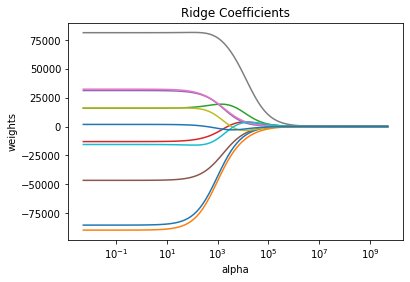

In [12]:
#Plotting ridge coefficents as a function of the regularization

import numpy as np
alphas =  10**np.linspace(10,-2,100)*0.5
coeff = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coeff.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coeff)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Coefficients')
plt.axis('tight')
plt.show()

Lasso(alpha=5000000000.0, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3782316637.773145, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2861183829.67511, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2164380640.5415306, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1637274581.438866, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1238538177.995857, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=936908711.4301934, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=708737081.4634038, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=536133611.00516266, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=405565415.3948445, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=306795363.6706582, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=232079441.68063864, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=175559586.71075636, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=132804389.1473342, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=100461650.1282523, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=75995554.14764665, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=57487849.769886784, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=43487450.13088917, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=32896661.232878413, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=24885117.82166057, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=18824679.033962358, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=14240179.342179025, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=10772173.450159412, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=8148754.173103217, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=6164233.69721033, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4663016.734416099, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3527401.1553593227, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2668349.615603151, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2018508.6292982749, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1526927.7544167063, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1155064.850041579, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=873764.2000038414, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=660970.5742330144, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=500000.0, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=378231.66377731453, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=286118.382967511, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=216438.06405415307, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=163727.45814388624, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=123853.81779958545, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=93690.87114301915, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=70873.70814634024, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=53613.36110051616, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=40556.54153948436, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=30679.536367065877, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=23207.944168063863, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=17555.958671075638, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=13280.43891473342, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=10046.16501282523, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=7599.555414764665, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=5748.784976988678, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4348.745013088917, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3289.6661232878414, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2488.511782166057, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1882.4679033962318, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1424.0179342178994, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1077.2173450159412, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=814.8754173103217, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=616.4233697210329, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=466.30167344161, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=352.74011553593226, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=266.8349615603151, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=201.85086292982749, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=152.69277544167062, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=115.50648500415791, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=87.37642000038414, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=66.09705742330144, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=50.0, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=37.823166377731454, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=28.611838296751102, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=21.643806405415308, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=16.372745814388658, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=12.38538177995857, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=9.369087114301934, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=7.087370814634009, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=5.361336110051605, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4.055654153948428, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3.0679536367065814, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.320794416806386, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.7555958671075638, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.328043891473342, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.004616501282523, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.7599555414764666, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.5748784976988678, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.4348745013088917, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.3289666123287841, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.24885117821660568, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.18824679033962358, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.14240179342179024, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.10772173450159389, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.08148754173103201, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.06164233697210317, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.0466301673441609, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.03527401155359316, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.026683496156031508, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.020185086292982747, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.015269277544167062, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.01155064850041579, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.008737642000038414, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.006609705742330144, copy_X=True, fit_intercept=False,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.005, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'weights')

Text(0.5, 1.0, 'Lasso coefficients')

(0.0012559432157547897,
 19905358527.674843,
 -98286.33134580195,
 89806.12036645487)

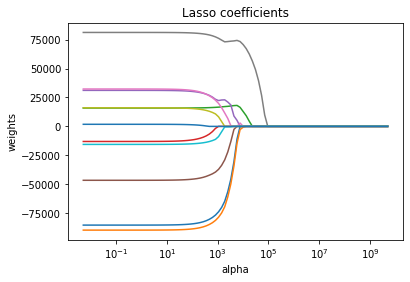

In [13]:
#Plotting lasso coefficents as a function of the regularization

import numpy as np
alphas =  10**np.linspace(10,-2,100)*0.5
coeff = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coeff.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coeff)
ax.set_xscale('log') 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients')
plt.axis('tight')
plt.show()


## 3

In [14]:
ols = LinearRegression()
ols.fit(X_train_o, y_train_o)
ols_y = ols.predict(X_test_o)
mean_absolute_error(y_test_o,ols_y)

lasso = Lasso(alpha=lasso_best_alpha['alpha'])
lasso.fit(X_train, y_train)
lasso_y = lasso.predict(X_test)
mean_absolute_error(y_test,lasso_y)
    
ridge = Ridge(alpha=ridge_best_alpha['alpha'])
ridge.fit(X_train, y_train)
ridge_y = ridge.predict(X_test)
mean_absolute_error(y_test,ridge_y)  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

50783.974603927876

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

50783.97366936819

Ridge(alpha=37.823166377731454, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

50730.71430765994

## 4

In [15]:
# Fitting LassoCV
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [16]:
# Print the alpha parameter obtained above

lasso_cv.alpha_

231.95068268703946

In [17]:
# Fit lasso using the above alpha and report MAE on Test.
lasso = Lasso(alpha=231.95068268703946)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mean_absolute_error(y_test, y_pred)

Lasso(alpha=231.95068268703946, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

50765.09711706191

## 5

## Answer


# Question 5 (5pts)

How do you think the performance of your model varies in the train and test set as you increase(decrease) the number of examples in the training dataset? Explain why does it change in a particular way.

## Answer
Effects on the model due to different sizes of the training and test sets:

If the training set is small (having a low number of examples), overfitting becomes harder to avoid as they have high variance. You don’t only over-fit to your training data, but sometimes you over-fit to your validation set as well. In other situations, noise becomes a real issue, be it in your target variable or in some of the features. Hence, in these conditions constrained modeling, smoothing and quantification of uncertainty help in getting better results. We can use simpler models (avoid higehr degree models) or regularization/ model averaging.

Genrally, it is desirable to have a large training set is (having a high number of examples) as it reduces overfitting. In most cases, our model becomes more confident about the underlying relationship and gives robust coefficient estimates. Moreover, we can afford to fit a more complex model which can perform well on the test set with the increased examples in the training set. In some cases, if the data is not relavent it may cause underfitting due to high bias in the model.

If the test is small, it will give a relatively noisy estimate of predictive performance. One solution to this dilemma is to use cross-validation such as k-fold or leave-one-out.